In [24]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import  linear_model
from pandas.tools.plotting import scatter_matrix
import tensorflow as tf
%matplotlib inline

ERROR! Session/line number was not unique in database. History logging moved to new session 83


In [25]:
boston = load_boston()
names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
df = pd.DataFrame(boston.data, columns=names)
df.ix[:10]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


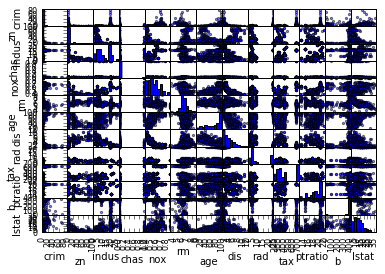

In [40]:
scatter_matrix(df)
plt.show()

In [64]:
x_data=df[:100].as_matrix(columns=None).transpose()
y_data=boston.target[:100]

X = tf.placeholder(tf.float32) #input 느낌
Y = tf.placeholder(tf.float32)

W=tf.Variable(tf.random_uniform([1,13],-1.0,1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
len(x_data)

13

In [68]:
hypothesis =tf.matmul(W,X)+b
cost =tf.reduce_mean(tf.square(hypothesis -Y))

a = tf.Variable(0.0000001)
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)

In [69]:
init =tf.initialize_all_variables()

sess=tf.Session()
sess.run(init)

In [71]:
for step in range(200000):
    sess.run(train, feed_dict={X:x_data, Y:y_data})
    if step % 50000 == 0:
        print (step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W), sess.run(b))

print ("final",step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W), sess.run(b))

0 16.9403 [[ 0.51352572  0.00684929 -0.10291129 -0.13590074 -0.00830221  0.08085874
  -0.0040538   0.24904999  0.12220223 -0.01310299  0.14380983  0.07262863
  -0.54312301]] [-0.39575958]
50000 16.7701 [[ 0.51352572  0.00591655 -0.12061796 -0.13590074 -0.00802281  0.0983676
  -0.00355128  0.24755988  0.10854335 -0.01227595  0.146045    0.07220154
  -0.54908347]] [-0.39426947]
100000 16.6172 [[ 0.51352572  0.00510246 -0.13696559 -0.13590074 -0.00774342  0.11554367
  -0.00328546  0.24606976  0.09532771 -0.01156704  0.14828017  0.07180678
  -0.55272287]] [-0.39277935]
150000 16.4762 [[ 0.51352572  0.00434637 -0.15217155 -0.13590074 -0.00746402  0.13268
  -0.00313654  0.2451316   0.08252839 -0.01091639  0.15051535  0.07142182
  -0.5557031 ]] [-0.39128923]
final 199999 16.3455 [[ 0.51352572  0.00364998 -0.16617373 -0.13590074 -0.00718463  0.14981599
  -0.00302107  0.24438655  0.07012861 -0.01032508  0.15275048  0.07103854
  -0.55802453]] [-0.38979915]
